# Comparatif entre MKL, OpenBLAS et BLIS

In [6]:
import time 
import os 
os.system("taskset -p 0xff %d" % os.getpid())
os.environ["BLIS_MAIN_FREE"]='1'
os.environ["BLIS_NUM_THREADS"] = "6"
import numpy as np 
from fonctions import time_count_np

In [7]:
results_blis = time_count_np("BLIS_auto")

blis_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
blas_opt_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
  NOT AVAILABLE
openblas_clapack_info:
  NOT AVAILABLE
flame_info:
  NOT AVAILABLE
atlas_3_10_threads_info:
  NOT AVAILABLE
atlas_3_10_info:
  NOT AVAILABLE
atlas_threads_info:
  NOT AVAILABLE
atlas_info:
  NOT AVAILABLE
accelerate_info:
  NOT AVAILABLE
lapack_info:
    libraries = ['lapack', 'lapack']
    library_dirs = ['/usr/lib']

In [1]:
# Change kernel to blas

In [1]:
import time 
import os 
os.system("taskset -p 0xff %d" % os.getpid())
os.environ["OPENBLAS_MAIN_FREE"]='1'
os.environ["OMP_NUM_THREADS"] = "6"
import numpy as np 
from fonctions import time_count_np

In [2]:
results_blas = time_count_np('OpenBLAS')

openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/OpenBLAS/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/opt/OpenBLAS/lib']
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/OpenBLAS/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/opt/OpenBLAS/lib']
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/OpenBLAS/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/opt/OpenBLAS/lib']
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/OpenBLAS/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/opt/OpenBLAS/lib']
### Temps d'execution moyen d'un matrice de taille :
	- (50x50)	:		6.170272827148438e-05	s.
	- (100x100)	:		0.00016722679138183593	s.


In [1]:
###Change KERNEL 

In [1]:
import time
import os 
os.system("taskset -p 0xff %d" % os.getpid())
os.environ["MKL_MAIN_FREE"]='1'
os.environ["MKL_NUM_THREADS"] = "6"
os.environ["OMP_NUM_THREADS"] = "6"
import numpy as np 
from fonctions import time_count_np

In [2]:
results_mkl = time_count_np('MKL')

mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/cesar/.anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/.anaconda3/include']
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/cesar/.anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/.anaconda3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/cesar/.anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/.anaconda3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/cesar/.anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/.anaconda3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/cesar/.anaconda3/lib']
    de

# Graphique 

In [3]:
import pickle
import os 
PATH = os.path.abspath('')
results_blis = pickle.load(open(PATH+"/data/"+'BLIS_auto'+".pkl","rb"))
x_blis, y_blis = zip(*sorted(results_blis.items()))
results_blas = pickle.load(open(PATH+"/data/"+'OpenBLAS'+".pkl","rb"))
x_blas, y_blas = zip(*sorted(results_blas.items()))
results_mkl = pickle.load(open(PATH+"/data/"+'MKL'+".pkl","rb"))
x_mkl, y_mkl = zip(*sorted(results_mkl.items()))

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

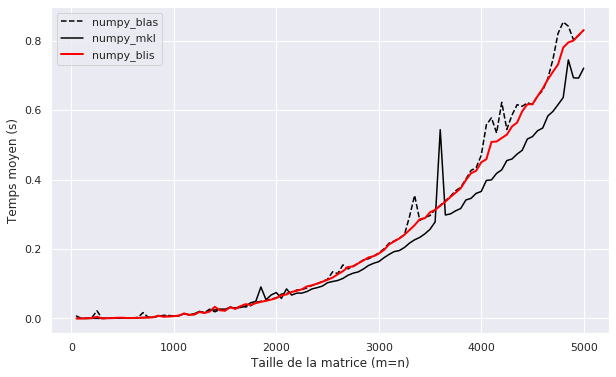

In [7]:
plt.figure(figsize=(10,6))
sns.set()
plt.plot(x_blas,y_blas,label='numpy_blas',color='black',linestyle='--')
plt.plot(x_mkl,y_mkl,label='numpy_mkl',color='black')
plt.plot(x_blis,y_blis,label='numpy_blis',linewidth=2,color='red')
plt.xlabel('Taille de la matrice (m=n)')
plt.ylabel('Temps moyen (s)')
#plt.title("Comparatif temps d'execution sur le produit matriciel (m=n), NUM_THREADS=2")
plt.legend()
plt.savefig(PATH+"/fig/comparaison.png")
plt.show()